In [41]:
import yfinance as yf

In [42]:
# Define the ticker symbol and the date range
ticker = "AAPL"
start_date = "2010-01-01"
end_date = "2024-09-19"

# Download the data
data = yf.download(ticker, start=start_date, end=end_date)
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.454506,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.465666,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.362820,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.351058,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.393281,447610800
...,...,...,...,...,...,...
2024-09-12,222.500000,223.550003,219.820007,222.770004,222.770004,37498200
2024-09-13,223.580002,224.039993,221.910004,222.500000,222.500000,36766600
2024-09-16,216.539993,217.220001,213.919998,216.320007,216.320007,59357400


<Axes: >

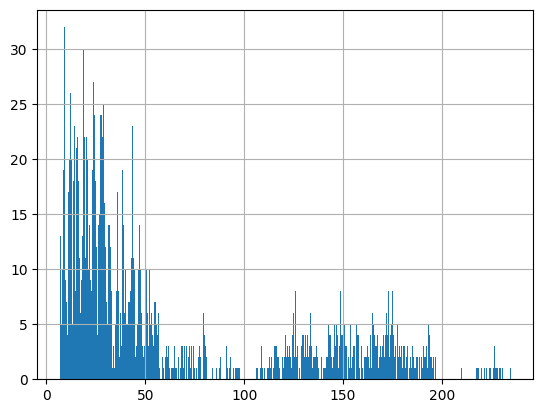

In [43]:
data["Close"].hist(bins=1000)

In [44]:
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.float_ = np.float64
from prophet import Prophet

In [45]:
data = data["Close"].reset_index().rename(columns={"Date": "ds", "Close": "y"})
data

,ds,y
0,2010-01-04,7.643214
1,2010-01-05,7.656429
2,2010-01-06,7.534643
3,2010-01-07,7.520714
4,2010-01-08,7.570714
...,...,...
3697,2024-09-12,222.770004
3698,2024-09-13,222.500000
3699,2024-09-16,216.320007
3700,2024-09-17,216.789993


In [46]:
df_train, df_test = data[: int(len(data) * 0.8)], data[int(len(data) * 0.8) :]

df_train.shape, df_test.shape

((2961, 2), (741, 2))

In [47]:
model = Prophet()
model.fit(df_train)

21:27:12 - cmdstanpy - INFO - Chain [1] start processing
21:27:14 - cmdstanpy - INFO - Chain [1] done processing


In [48]:
periods = df_test.shape[0]
future = model.make_future_dataframe(periods=periods)

In [49]:
forecast = model.predict(future)
df_pred = forecast.tail(periods).reset_index()[["ds", "yhat"]]
df_pred

,ds,yhat
0,2021-10-07,154.685883
1,2021-10-08,154.797397
2,2021-10-09,155.141336
3,2021-10-10,155.356340
4,2021-10-11,155.533280
...,...,...
736,2023-10-13,249.117971
737,2023-10-14,249.438784
738,2023-10-15,249.625965
739,2023-10-16,249.771142


In [50]:
# Import RMSE and MAPE
from sklearn.metrics import root_mean_squared_error, mean_absolute_percentage_error

# Calculate RMSE and MAPE
rmse = root_mean_squared_error(df_test["y"], df_pred["yhat"])
mape = mean_absolute_percentage_error(df_test["y"], df_pred["yhat"])

print("RMSE:", rmse)
print("MAPE:", mape)

RMSE: 35.94691005084131
MAPE: 0.19117496309652382
